<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase31_Keywords_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos

In [1]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xvzf /content/aclImdb_v1.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclIm

In [2]:
import os
import numpy as np
import pandas as pd

# NEGATIVAS
dir_neg_train = "/content/aclImdb/train/neg/"
neg_reviews = []

for f in os.listdir(dir_neg_train):
  with open(f"{dir_neg_train}/{f}",encoding = 'UTF-8') as neg:
    neg_reviews.append(neg.read())

dir_neg_test = "/content/aclImdb/test/neg/"
for f in os.listdir(dir_neg_test):
  with open(f"{dir_neg_test}/{f}", encoding = 'UTF-8') as neg:
    neg_reviews.append(neg.read())

# POSITIVAS
dir_pos_train = "/content/aclImdb/train/pos/"
pos_reviews = []

for f in os.listdir(dir_pos_train):
  with open(f"{dir_pos_train}/{f}", encoding = 'UTF-8') as pos:
    pos_reviews.append(pos.read())

dir_pos_test = "/content/aclImdb/test/pos/"
for f in os.listdir(dir_pos_test):
  with open(f"{dir_pos_test}/{f}", encoding = 'UTF-8') as pos:
    pos_reviews.append(pos.read())

# Pandas DF

pos_df = pd.DataFrame(pos_reviews, columns=["REVIEW"])
pos_df["TARGET"] = "POS"
neg_df = pd.DataFrame(neg_reviews, columns=["REVIEW"])
neg_df["TARGET"] = "NEG"

df = pd.concat([pos_df, neg_df], axis="rows")

df = df[df["REVIEW"].apply(len) <= 512].head(500)
df.head()

,REVIEW,TARGET
4,Simply but imaginatively filmed studio-set per...,POS
14,Good old black and white Graham Greene based p...,POS
15,Busy Phillips put in one hell of a performance...,POS
16,Kurosawa is a proved humanitarian. This movie ...,POS
20,What a surprise; two outstanding performances ...,POS


# Instalamos librerías

In [3]:
!pip install transformers
!pip install sentence_transformers
!pip install keybert
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Cuando termine de correr esta celda, apretar el botón que aparece para reiniciar el entorno.

# Hugging face

https://huggingface.co/


Ejemplo: Traducir texto de inglés a español.

https://huggingface.co/Helsinki-NLP/opus-mt-en-es?text=My+name+is+Sarah+and+I+live+in+London

In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [5]:
def translate(x: str) -> str:
    inputs = tokenizer.encode(x, return_tensors='pt')
    outputs = model.generate(inputs)
    return tokenizer.decode(outputs[0])

In [6]:
%%time
translated = df["REVIEW"].head().apply(translate)

for t in translated:
  print(t)

<pad> Sencilla pero imaginativamente filmado estudio-set  performance short, una combinación perfecta de música e imágenes que define la frescura de la cool y la cadera de la cadera. Los arreglos visuales y musicales precisos dan la mentira a su pretensión de ser un disco de una sesión de jam: lo que es, es un video pop - cada poco tan estilizado y saber como eso implica, y tanto mejor para él. Entre las mejores películas de música jamás hechas, y casi seguro el más cinemático. Estos gatos son sólidos...</s>
<pad> El bueno negro y blanco Graham Greene basado en personas en tiempos peligrosos haciendo cosas heroicas y misteriosas. Apenas un disparo o un golpe lanzado y cien veces más interesante que el brillo que está siendo acuñado por Hollywood hoy. Bacall ilumina la pantalla, por supuesto y Boyer es totalmente atractivo. Ya no hacen películas como esta.</s>
<pad> Los ocupados Phillips pusieron en un infierno de una actuación, tanto cómico y dramático. Erika Christensen era bueno, per

# KeyBERT



In [7]:
from keybert import KeyBERT

kw_model = KeyBERT()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

- Top n: Cantidad de keywords por review
- keyphrase_ngram_range: Cantidad de palabras por keyword (keyphrase)

In [8]:
%%time
df["KEYWORDS"] = df.REVIEW.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: user 1min 22s, sys: 30.1 s, total: 1min 52s
Wall time: 1min 23s


In [9]:
pd.set_option("display.max_colwidth", None)

In [10]:
df.head()

,REVIEW,TARGET,KEYWORDS
4,"Simply but imaginatively filmed studio-set performance short, a perfect match of music and images that defines the very coolness of cool and the hipness of hip. The precise visual and musical arrangements give the lie to its claim to be a record of a jam session: what it is, is a pop video - every bit as stylised and knowing as that implies, and all the better for it. Among the very best music films ever made, and almost certainly the most cinematic. These cats are solid gone, daddy-o ...",POS,"[(musical, 0.5125), (music, 0.4732), (cinematic, 0.4717)]"
14,Good old black and white Graham Greene based people in dangerous times doing heroic and mysterious things. Hardly a shot fired or a punch thrown and a hundred time more interesting than the glop that's being minted by Hollywood today. Bacall lights up the screen of course and Boyer is entirely engaging. They don't make movies like this any more.,POS,"[(movies, 0.3945), (greene, 0.3137), (bacall, 0.3012)]"
15,"Busy Phillips put in one hell of a performance, both comedic and dramatic. Erika Christensen was good but Busy stole the show. It was a nice touch after The Smokers, a movie starring Busy, which wasnt all that great. If Busy doesnt get a nomination of any kind for this film it would be a disaster. Forget Mona Lisa Smile, see Home Room.",POS,"[(mona, 0.3242), (busy, 0.324), (lisa, 0.31)]"
16,Kurosawa is a proved humanitarian. This movie is totally about people living in poverty. You will see nothing but angry in this movie. It makes you feel bad but still worth. All those who's too comfortable with materialization should spend 2.5 hours with this movie.,POS,"[(kurosawa, 0.6008), (humanitarian, 0.3213), (poverty, 0.297)]"
20,What a surprise; two outstanding performances by the lead actresses in this film. This is the best work Busy Phillips has ever done and the best from Erika Christensen since Traffic. This film certainly should be in Oscar contention. See this movie!,POS,"[(oscar, 0.4332), (actresses, 0.4004), (performances, 0.3769)]"


Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las kw:

In [11]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [12]:
df.head()

,REVIEW,TARGET,KEYWORDS
4,"Simply but imaginatively filmed studio-set performance short, a perfect match of music and images that defines the very coolness of cool and the hipness of hip. The precise visual and musical arrangements give the lie to its claim to be a record of a jam session: what it is, is a pop video - every bit as stylised and knowing as that implies, and all the better for it. Among the very best music films ever made, and almost certainly the most cinematic. These cats are solid gone, daddy-o ...",POS,"[musical, music, cinematic]"
14,Good old black and white Graham Greene based people in dangerous times doing heroic and mysterious things. Hardly a shot fired or a punch thrown and a hundred time more interesting than the glop that's being minted by Hollywood today. Bacall lights up the screen of course and Boyer is entirely engaging. They don't make movies like this any more.,POS,"[movies, greene, bacall]"
15,"Busy Phillips put in one hell of a performance, both comedic and dramatic. Erika Christensen was good but Busy stole the show. It was a nice touch after The Smokers, a movie starring Busy, which wasnt all that great. If Busy doesnt get a nomination of any kind for this film it would be a disaster. Forget Mona Lisa Smile, see Home Room.",POS,"[mona, busy, lisa]"
16,Kurosawa is a proved humanitarian. This movie is totally about people living in poverty. You will see nothing but angry in this movie. It makes you feel bad but still worth. All those who's too comfortable with materialization should spend 2.5 hours with this movie.,POS,"[kurosawa, humanitarian, poverty]"
20,What a surprise; two outstanding performances by the lead actresses in this film. This is the best work Busy Phillips has ever done and the best from Erika Christensen since Traffic. This film certainly should be in Oscar contention. See this movie!,POS,"[oscar, actresses, performances]"


Si luego vamos a hacer algún análisis de estas keywords, seguramente sea una buena opción lemmatizarlas:

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemma(review:str) -> str:
    """
    Lemmatize using spacy.
    """

    doc = nlp(review)
    lemma_review = []
    for token in doc:
        lemma_review.append(token.lemma_)

    return " ".join(lemma_review)

In [14]:
df["KEYWORDS"] = df["KEYWORDS"].apply(lambda kw: [lemma(k) for k in kw])

In [15]:
df.head()

,REVIEW,TARGET,KEYWORDS
4,"Simply but imaginatively filmed studio-set performance short, a perfect match of music and images that defines the very coolness of cool and the hipness of hip. The precise visual and musical arrangements give the lie to its claim to be a record of a jam session: what it is, is a pop video - every bit as stylised and knowing as that implies, and all the better for it. Among the very best music films ever made, and almost certainly the most cinematic. These cats are solid gone, daddy-o ...",POS,"[musical, music, cinematic]"
14,Good old black and white Graham Greene based people in dangerous times doing heroic and mysterious things. Hardly a shot fired or a punch thrown and a hundred time more interesting than the glop that's being minted by Hollywood today. Bacall lights up the screen of course and Boyer is entirely engaging. They don't make movies like this any more.,POS,"[movie, greene, bacall]"
15,"Busy Phillips put in one hell of a performance, both comedic and dramatic. Erika Christensen was good but Busy stole the show. It was a nice touch after The Smokers, a movie starring Busy, which wasnt all that great. If Busy doesnt get a nomination of any kind for this film it would be a disaster. Forget Mona Lisa Smile, see Home Room.",POS,"[mona, busy, lisa]"
16,Kurosawa is a proved humanitarian. This movie is totally about people living in poverty. You will see nothing but angry in this movie. It makes you feel bad but still worth. All those who's too comfortable with materialization should spend 2.5 hours with this movie.,POS,"[kurosawa, humanitarian, poverty]"
20,What a surprise; two outstanding performances by the lead actresses in this film. This is the best work Busy Phillips has ever done and the best from Erika Christensen since Traffic. This film certainly should be in Oscar contention. See this movie!,POS,"[oscar, actress, performance]"


Ahora podemos ver la popularidad de las keywords:

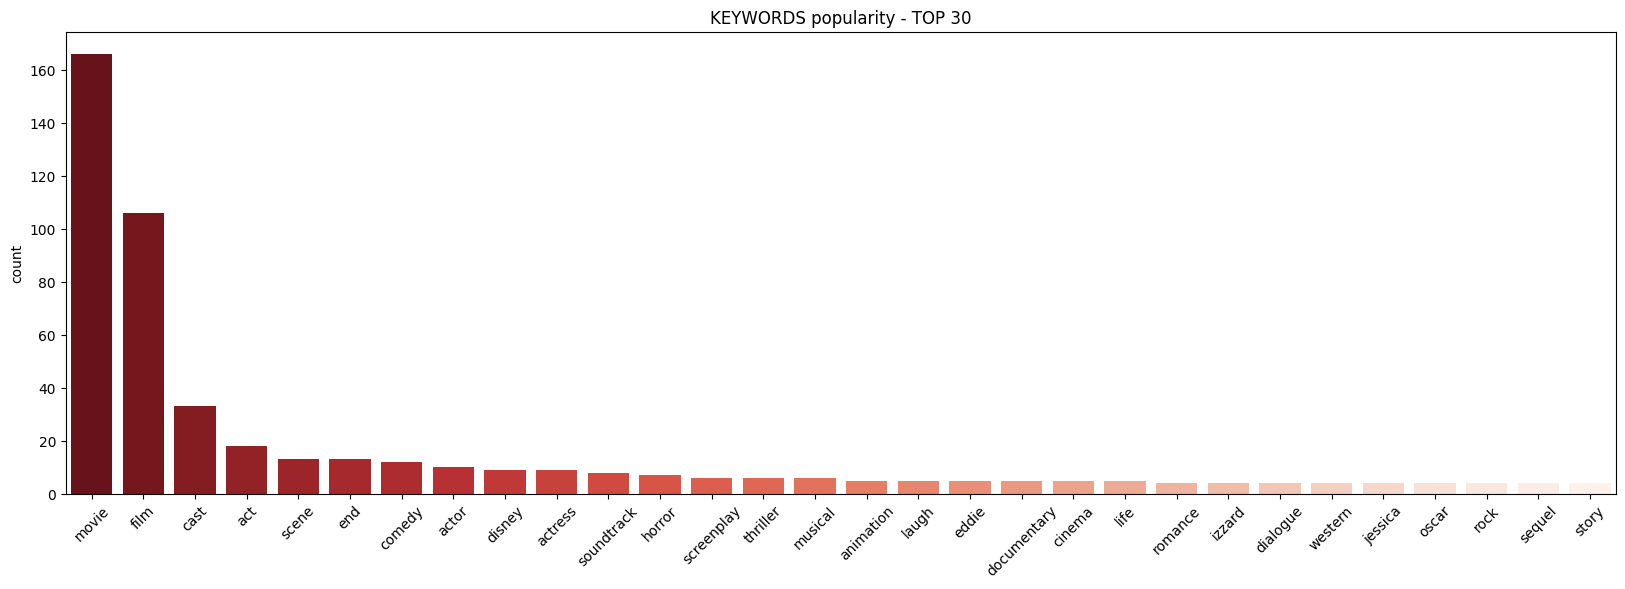

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of keywords
flattened_keywords = [keyword for sublist in df["KEYWORDS"] for keyword in sublist]

plt.figure(figsize=(20,6))
sns.countplot(x=flattened_keywords,
              order=pd.Series(flattened_keywords).value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

# BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [17]:
from bertopic import BERTopic

In [18]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["REVIEW"].values)

2024-07-10 21:45:35,291 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2024-07-10 21:46:00,349 - BERTopic - Embedding - Completed ✓
2024-07-10 21:46:00,352 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-10 21:46:12,898 - BERTopic - Dimensionality - Completed ✓
2024-07-10 21:46:12,901 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-10 21:46:12,939 - BERTopic - Cluster - Completed ✓
2024-07-10 21:46:12,946 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-10 21:46:13,007 - BERTopic - Representation - Completed ✓


CPU times: user 37 s, sys: 781 ms, total: 37.8 s
Wall time: 37.8 s


In [19]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name,Representation,Representative_Docs
0,-1,104,-1_the_and_is_of,"[the, and, is, of, this, it, to, in, as, that]","[I think that this film was one of Kurt Russels good movies. Kurt russel is my favorite actor so I think that he is a good actor in any role he plays. But this movie had a lot of action in it and I know that it should have more then a 5.6 out of 10 on the meter but many people did not like this movie. Oh well I thought it was good so I think that every one should see this movie. If you see this movie and like it I think that you should see Back Draft also with Kurt Russel. I give Soldier *** 1/2 out of *****, This is one of the best comedy ever ! The writing of this parody of soap is brilliant and the cast, well just look at the names of the cast and you'll understand why it is so great. If you're a Kevin Kline fan, he does (as always) an fantastic performance, and Robert Downey Jr is perfect. If you don't laugh while seen this movie, you don't have any sense of humor., What can i say about the first film ever?<br /><br />You can't rate this, because it's not supposed to be entertaining. But if you HAVE to rate it, you should give it a 10. It is stunning to see moving images from the year 1895. This was one of the most important movies in history. I wonder how it was to be one of the people who saw the first movie ever!<br /><br />]"
1,0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama., This is one of the funniest movies I have ever seen. If you know the Real World and the people from those shows, this movie will be top notch, if you have never seen the real world you will still think it is an extremely funny movie but you won't get some of the inside jokes about the actors and the tv show., What can i say about this movie? I have seen it quite a few times since the first time when i was around 6. I have seen the english version and it is done very well. It is a great movie for all ages, but it is directed more for children. I love the childlike humor and appreciate it. If you have not seen it, you should try to rent a copy, you will not be disappointed!]"
2,1,11,1_the_to_this_and,"[the, to, this, and, is, it, japanese, movie, of, you]","[I watched this movie when I was almost quite a kid, and, naturally, was moved to tears by this story of a fox family. The fantastic scenery at Hokkaidô, the excellent storytelling and last not least the wonderful soundtrack provide a rare intimacy with the protagonists. I am still searching for some copy of the gorgeous soundtrack. To German viewers it might be useful to know that the DEFA-dubbing is the only one worth listening to. I taped both (DEFA and BR) but I keep viewing the first one only., Lensman is a rather lesser-known Anime gem from Toho and MK studios.It's loosely based on the novel,but it reminds me more of the game ""Metroid"".<br /><br />If you want to see this,see it in Japanese with Subtitles or just plain Japanese.The English dubbed version was almost cropped and edited to death.<br /><br />There is not much new,despite the fact that it's the 1st animated feature to combine CG-graphics with hand-drawn animation,but it's fun to watch,nevertheless., One word can describe this movie and that is weird. I recorded this movie one day because it was a Japanese animation and it was old so I thought it would be interesting. Well it was, the movie is about a young boy who travels the universe to get a metal body so he can seek revenge. On the way he meets very colorful characters and must ultimately decide if he wants the body or not. Very strange, if you are a fan of animation/science-fiction you

El topico -1 corresponde a outliers.

In [20]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

,REVIEW,TARGET,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs
0,"Simply but imaginatively filmed studio-set performance short, a perfect match of music and images that defines the very coolness of cool and the hipness of hip. The precise visual and musical arrangements give the lie to its claim to be a record of a jam session: what it is, is a pop video - every bit as stylised and knowing as that implies, and all the better for it. Among the very best music films ever made, and almost certainly the most cinematic. These cats are solid gone, daddy-o ...",POS,"[musical, music, cinematic]",0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama., This is one of the funniest movies I have ever seen. If you know the Real World and the people from those shows, this movie will be top notch, if you have never seen the real world you will still think it is an extremely funny movie but you won't get some of the inside jokes about the actors and the tv show., What can i say about this movie? I have seen it quite a few times since the first time when i was around 6. I have seen the english version and it is done very well. It is a great movie for all ages, but it is directed more for children. I love the childlike humor and appreciate it. If you have not seen it, you should try to rent a copy, you will not be disappointed!]"
1,Good old black and white Graham Greene based people in dangerous times doing heroic and mysterious things. Hardly a shot fired or a punch thrown and a hundred time more interesting than the glop that's being minted by Hollywood today. Bacall lights up the screen of course and Boyer is entirely engaging. They don't make movies like this any more.,POS,"[movie, greene, bacall]",0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama., This is one of the funniest movies I have ever seen. If you know the Real World and the people from those shows, this movie will be top notch, if you have never seen the real world you will still think it is an extremely funny movie but you won't get some of the inside jokes about the actors and the tv show., What can i say about this movie? I have seen it quite a few times since the first time when i was around 6. I have seen the english version and it is done very well. It is a great movie for all ages, but it is directed more for children. I love the childlike humor and appreciate it. If you have not seen it, you should try to rent a copy, you will not be disappointed!]"
2,"Busy Phillips put in one hell of a performance, both comedic and dramatic. Erika Christensen was good but Busy stole the show. It was a nice touch after The Smokers, a movie starring Busy, which wasnt all that great. If Busy doesnt get a nomination of any kind for this film it would be a disaster. Forget Mona Lisa Smile, see Home Room.",POS,"[mona, busy, lisa]",0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama., This 

In [24]:
topic_model.visualize_topics()

In [22]:
%%time
# Ensure calculate_probabilities is set to True for generating embeddings
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["REVIEW"].values)

# Verify if embeddings were generated
if topic_model.topic_embeddings_ is not None:
    print("Topic embeddings have been generated.")
else:
    print("Topic embeddings are missing. Check your model fitting process.")

topic_model.visualize_topics()

2024-07-10 21:50:43,891 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2024-07-10 21:51:09,538 - BERTopic - Embedding - Completed ✓
2024-07-10 21:51:09,542 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-10 21:51:13,119 - BERTopic - Dimensionality - Completed ✓
2024-07-10 21:51:13,121 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-10 21:51:13,158 - BERTopic - Cluster - Completed ✓
2024-07-10 21:51:13,164 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-10 21:51:13,224 - BERTopic - Representation - Completed ✓


Topic embeddings have been generated.
CPU times: user 29.5 s, sys: 868 ms, total: 30.4 s
Wall time: 31.2 s


Keywords más frecuentes en cada tópico

In [23]:
topic_keywords = df.explode("KEYWORDS").groupby(["TOPIC_ID"]).agg({"KEYWORDS": pd.Series.mode})
topic_keywords = topic_keywords.rename(columns={"KEYWORDS": "TOPIC_MOST_FREQ_KEYWORD"})
df = df.merge(topic_keywords, how='left', on="TOPIC_ID")
df.head()

,REVIEW,TARGET,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs,TOPIC_MOST_FREQ_KEYWORD
0,"Simply but imaginatively filmed studio-set performance short, a perfect match of music and images that defines the very coolness of cool and the hipness of hip. The precise visual and musical arrangements give the lie to its claim to be a record of a jam session: what it is, is a pop video - every bit as stylised and knowing as that implies, and all the better for it. Among the very best music films ever made, and almost certainly the most cinematic. These cats are solid gone, daddy-o ...",POS,"[musical, music, cinematic]",0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama., This is one of the funniest movies I have ever seen. If you know the Real World and the people from those shows, this movie will be top notch, if you have never seen the real world you will still think it is an extremely funny movie but you won't get some of the inside jokes about the actors and the tv show., What can i say about this movie? I have seen it quite a few times since the first time when i was around 6. I have seen the english version and it is done very well. It is a great movie for all ages, but it is directed more for children. I love the childlike humor and appreciate it. If you have not seen it, you should try to rent a copy, you will not be disappointed!]",movie
1,Good old black and white Graham Greene based people in dangerous times doing heroic and mysterious things. Hardly a shot fired or a punch thrown and a hundred time more interesting than the glop that's being minted by Hollywood today. Bacall lights up the screen of course and Boyer is entirely engaging. They don't make movies like this any more.,POS,"[movie, greene, bacall]",0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama., This is one of the funniest movies I have ever seen. If you know the Real World and the people from those shows, this movie will be top notch, if you have never seen the real world you will still think it is an extremely funny movie but you won't get some of the inside jokes about the actors and the tv show., What can i say about this movie? I have seen it quite a few times since the first time when i was around 6. I have seen the english version and it is done very well. It is a great movie for all ages, but it is directed more for children. I love the childlike humor and appreciate it. If you have not seen it, you should try to rent a copy, you will not be disappointed!]",movie
2,"Busy Phillips put in one hell of a performance, both comedic and dramatic. Erika Christensen was good but Busy stole the show. It was a nice touch after The Smokers, a movie starring Busy, which wasnt all that great. If Busy doesnt get a nomination of any kind for this film it would be a disaster. Forget Mona Lisa Smile, see Home Room.",POS,"[mona, busy, lisa]",0,374,0_the_and_of_is,"[the, and, of, is, this, it, to, movie, in, film]","[this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyon

Además, podríamos obtener sentimiento de cada review y luego asociar tópicos a sentimientos o keywor